In [1]:
# -------------------------
# If you use Google Colab
# -------------------------
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Colab Notebooks/mavi"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/mavi


In [2]:
import numpy as np 
import torch
import matplotlib.pyplot as plt
from mavi.vanishing_ideal import VanishingIdeal

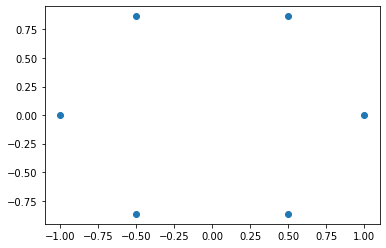

In [3]:
theta = [np.pi*i/3 for i in range(6)]
X = np.vstack((np.cos(theta), np.sin(theta))).T
X = torch.tensor(X)

plt.plot(X[:,0], X[:,1], "o")

In [5]:
vi = VanishingIdeal()
vi.fit(X, 0.01, method="grad", backend='torch') 
output = vi.evaluate(X)
print(X.device, vi.device, output.device)

cpu cpu cpu


In [7]:
Z = X.cuda()
vi.to(Z.device)
output = vi.evaluate(Z)
print(Z.device, vi.device, output.device)

cuda:0 cuda:0 cuda:0


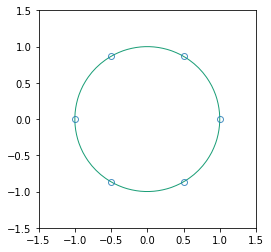

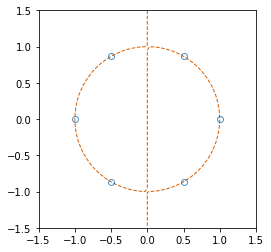

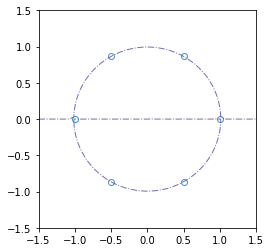

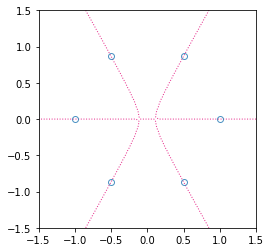

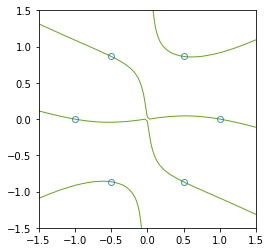

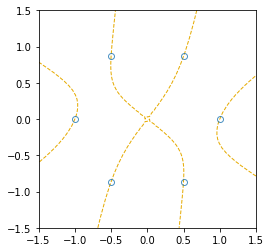

In [11]:
vi.to('cpu')
vi.plot(Z.to('cpu'), splitshow=True)